# Testing head association

In [1]:
from scripts.imports import *

df_ph = pd.read_csv(paths['phrase_dataset'], index_col='node', low_memory=False)

df_sgph = df_ph[
    (df_ph.n_heads == 1)
    & (df_ph.n_phatoms == 1)
    & (df_ph.heads_POS != 'PREP')
].copy()

out = Exporter(
    paths['outdir'], 
    'head_association'
)

from matplotlib import colors

## Sample the dataset

In [2]:
df_sgph.shape

(87131, 51)

In [3]:
out.number(
    df_sgph.shape[0],
    'nphrases',
)

In [4]:
df_sgph.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'heads_etcbc',
       'heads_utf8', 'heads_utf8d', 'heads_POS', 'Phrase Heads', 'function',
       'text', 'types', 'n_heads', 'word_lexs', 'n_words', 'n_phatoms',
       'clause_node', 'verb', 'verbform', 'verb_etcbc', 'verb_txt', 'clause',
       'sentence', 'cl_rela', 'domain', 'genre', 'gendom', 'cl_kind', 'PP',
       'unmodified', 'PL', 'ØPP', 'PARA', 'DEF', 'GP', 'NUM', 'SPEC', 'ADJV',
       'SFX3', 'SFX', 'APPO', 'QUANT', 'SFX1', 'SFX2', 'DU', 'CARDC', 'HLOC',
       'TIMEAPPO', 'ADVB', 'DEMON'],
      dtype='object')

In [5]:
# prepare a sample to show in the thesis
show_sample = df_sgph[['verse']].copy()
show_sample['text'] = '\texthebrew{'+df_sgph.text.str.strip().astype(str)+'}'
get_cols = ['Phrase Heads', 'function', 'types']
show_sample[get_cols] = df_sgph[get_cols]
show_sample = show_sample.sample(10, random_state=69420)
out.table(
    show_sample, 
    'sampletable',
    caption='Random Sample of the Phrase Dataset',
    escape=True
)
show_sample

,verse,text,Phrase Heads,function,types
node,,,,,
739205,1_Samuel 20:1,\texthebrew{עֲוֹנִ֤י},\texthebrew{עון},Subj,NP
864595,Proverbs 17:24,\texthebrew{אֶת־פְּנֵ֣י מֵבִ֣ין},\texthebrew{בין},PreC,PP
874578,Esther 3:7,\texthebrew{הוּא־},\texthebrew{הוא},Subj,PPrP
776465,Isaiah 10:25,\texthebrew{עַל־תַּבְלִיתָֽם׃},\texthebrew{תבלית},PreC,PP
854285,Job 6:21,\texthebrew{עַ֭תָּה},\texthebrew{עתה},Time,AdvP
757726,1_Kings 10:2,\texthebrew{גְּ֠מַלִּים},\texthebrew{גמל},Subj,NP
720905,Joshua 18:9,\texthebrew{עַל־סֵ֑פֶר},\texthebrew{ספר},Cmpl,PP
896190,2_Chronicles 6:40,\texthebrew{לִתְפִלַּ֖ת הַמָּקֹ֥ום הַזֶּֽה׃ ס},\texthebrew{תפלה},Cmpl,PP
752137,2_Samuel 21:10,\texthebrew{אֶת־הַשַּׂ֜ק},\texthebrew{שק},Objc,PP


## Explore functions

In [6]:
function_cts = pd.DataFrame(
    df_sgph
        .function.value_counts()
        .drop('Spec')
).T


function_cts[function_cts.T.sort_values(ascending=False, by='function').index]
function_cts.index = ['freq.']
function_cts.columns.name = 'function'
function_cts.loc['prop.'] = (function_cts.values / function_cts.values.sum())[0].round(2)
function_cts.loc['freq.'] = pd.Series(function_cts.loc['freq.'].astype(int), dtype=object)
#function_cts['TOTAL'] = function_cts.sum(1)

out.table(function_cts, 
          'funct_counts', 
          caption='Sampled Phrase Functions',
          adjustbox=True
         )

function_cts

function,Subj,Cmpl,Objc,PreC,Adju,Modi,Time,Loca
freq.,26228.0,18149.00,17019.0,9758.00,6952.00,3545.00,3244.00,2234.00
prop.,0.3,0.21,0.2,0.11,0.08,0.04,0.04,0.03


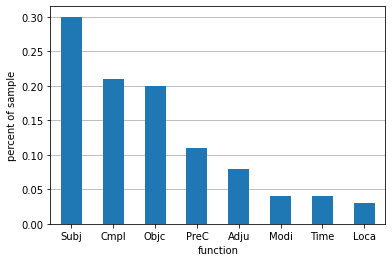

In [7]:
fig, ax = plt.subplots()
function_cts.loc['prop.'].plot(kind='bar', ax=ax)
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('percent of sample')
out.plot('bar_function_perc')

In [8]:
type_cts = pd.DataFrame(
    df_sgph
        .types.value_counts()
).T

type_cts[type_cts.T.sort_values(ascending=False, by='types').index]
type_cts.index = ['freq.']
type_cts.columns.name = 'type'
type_cts.loc['prop.'] = (type_cts.values / type_cts.values.sum())[0].round(2)

out.table(
    type_cts,
    'type_counts',
    caption='Sampled Phrase Types'
)

type_cts

type,PP,NP,PrNP,AdvP,PPrP,AdjP
freq.,36449.00,33092.00,6943.00,5289.00,3903.00,1455.00
prop.,0.42,0.38,0.08,0.06,0.04,0.02


In [10]:
# the combined % of minor types
percent_minortype = type_cts.loc['prop.']['PrNP':'AdjP'].sum() * 100

out.number(
    percent_minortype,
    'percent_minortype',
)

percent_minortype

20.0

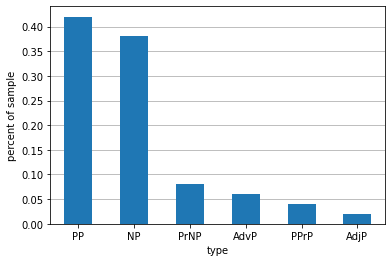

In [11]:
fig, ax = plt.subplots()
type_cts.loc['prop.'].plot(kind='bar', ax=ax)
ax.set_axisbelow(True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_ylabel('percent of sample')
out.plot('bar_type_perc')

In [25]:
pp_np_diff = 100*(type_cts['PP']['prop.'] - type_cts['NP']['prop.'])

out.number(
    pp_np_diff,
    'pp_np_diff',
)

pp_np_diff

3.9999999999999982

## Head lexeme association per function

In [12]:
lex_ct = pd.pivot_table(
    df_sgph,
    index=['heads_etcbc', 'heads_utf8d', 'Phrase Heads'],
    columns='function',
    aggfunc='size',
    fill_value=0,
)

lex_ct = lex_ct.T
lex_ct = lex_ct.drop('Spec', 0)

lex_ct

heads_etcbc,<B/,<B=/,<B==/,<BD/,<BDH/,<BDH=/,<BDJH/,<BDJHW/,<BDT/,<BDWN/,...,ZRW<=/,ZRX=/,ZRXJH/,ZRZJR/,ZW<H/,ZW<[,ZWB/,ZWB[,ZWJT/,ZWZJM/
heads_utf8d,בע,בע,בע,דבע,הדבע,הדבע,הידבע,והידבע,תדבע,ןודבע,...,עורז,חרז,היחרז,ריזרז,העוז,עוז,בוז,בוז,תיוז,םיזוז
Phrase Heads,\texthebrew{עב},\texthebrew{עב},\texthebrew{עב},\texthebrew{עבד},\texthebrew{עבדה},\texthebrew{עבדה},\texthebrew{עבדיה},\texthebrew{עבדיהו},\texthebrew{עבדת},\texthebrew{עבדון},...,\texthebrew{זרוע},\texthebrew{זרח},\texthebrew{זרחיה},\texthebrew{זרזיר},\texthebrew{זועה},\texthebrew{זוע},\texthebrew{זוב},\texthebrew{זוב},\texthebrew{זוית},\texthebrew{זוזים}
function,,,,,,,,,,,,,,,,,,,,,
Adju,6,0,0,23,19,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
Cmpl,6,0,1,93,13,0,0,2,1,0,...,0,0,0,0,0,0,5,0,0,0
Loca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Modi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Objc,3,0,0,47,21,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,1
PreC,1,0,0,75,5,0,0,0,0,2,...,0,0,0,0,1,0,0,0,1,0
Subj,7,1,0,155,10,1,1,5,0,0,...,0,0,1,1,0,1,3,7,0,0


In [13]:
out.number(
    lex_ct.shape[1],
    'nlexemes',
)

In [11]:
# get an excerpt table for the thesis
lc_show = lex_ct[lex_ct.sum().sort_values(ascending=False).index].copy()
lc_show = lc_show.loc[lc_show.sum(1).sort_values(ascending=False).index]
lc_show = lc_show.iloc[:, :13].droplevel(['heads_etcbc','heads_utf8d'], 1)
out.table(
    lc_show,
    'colexmatrix',
    caption=(
        'Top of the Function/Head Collocation Matrix '
        f'(original={lex_ct.shape[0]} × {lex_ct.shape[1]}) '
    ),
    adjustbox=True,
)
lc_show

Phrase Heads,\texthebrew{יהוה},\texthebrew{בן},\texthebrew{יום},\texthebrew{ארץ},\texthebrew{איש},\texthebrew{יד},\texthebrew{בית},\texthebrew{דבר},\texthebrew{עם},\texthebrew{מלך},\texthebrew{הוא},\texthebrew{אלהים},\texthebrew{שם}
function,,,,,,,,,,,,,
Subj,2067,757,184,224,871,192,122,354,426,509,952,429,0
Cmpl,701,325,36,726,184,485,524,95,332,299,0,216,341
Objc,180,268,84,306,187,273,243,495,249,100,0,116,0
PreC,222,301,74,130,133,128,113,62,87,50,15,125,92
Adju,151,107,41,47,104,135,66,139,54,43,0,34,4
Modi,0,0,1,2,1,2,0,0,1,1,0,0,61
Time,0,0,1281,0,0,0,0,13,0,0,0,0,0
Loca,20,6,0,221,0,22,97,0,3,1,0,0,312


In [12]:
lex_fs, lex_odds = sig.apply_fishers(lex_ct, 0, 1)

In [13]:
# replace infinite values (P=0)
fishermax = lex_fs[np.isfinite(lex_fs)].max().max()
fishermin = lex_fs[np.isfinite(lex_fs)].min().min()
lex_fs = lex_fs.replace(np.inf, fishermax)
lex_fs = lex_fs.replace(-np.inf, fishermin)

# Visualizing Attraction

In [14]:
class MidpointNormalize(colors.Normalize):
    """Normalize values to 0-1 for color selection.
    
    This class was modified from:
    https://matplotlib.org/stable/tutorials/colors/colormapnorms
    .html#custom-normalization-manually-implement-two-linear-ranges
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.interp(value, x, y)

def stripplot_divcolors(x, maxval, midpoint, minval, cmap):
    """Format diverging colors for a Seaborn stripplot.
    
    Args:
        x: scalar (list, array)
        maxval: vmax for color normalization 
            (see color Normalizers in matplotlib)
        midpoint: value to center the divergence on
        minval: vmin for color normalization 
        cmap: matplotlib cmap object
        
    Returns:
        (hue, palette) - where hue is an array that corresponds
            with x, where each value has been mapped to a color
            linearly with a specified midpoint; palette is a dict
            that maps each unique mapped value is mapped to RGBA
            array for seaborn.stripplot paletter arg
    """
    # maps x-values to 0-1 for cmap
    normalizer = MidpointNormalize(
        vmin=fishermin, 
        vmax=fishermax, 
        midpoint=0,
    )
    # these are the 1-to-1 normalized values
    hue = normalizer(data)
    
    # this dict maps each unique, normalized value 
    # to its RGBA representation; this is used by the stripplot
    # argument "palette"
    unique_hue = np.unique(hue)
    palette = dict(
        zip(unique_hue, cmap(unique_hue))
    )

    # done!
    return (hue, palette)

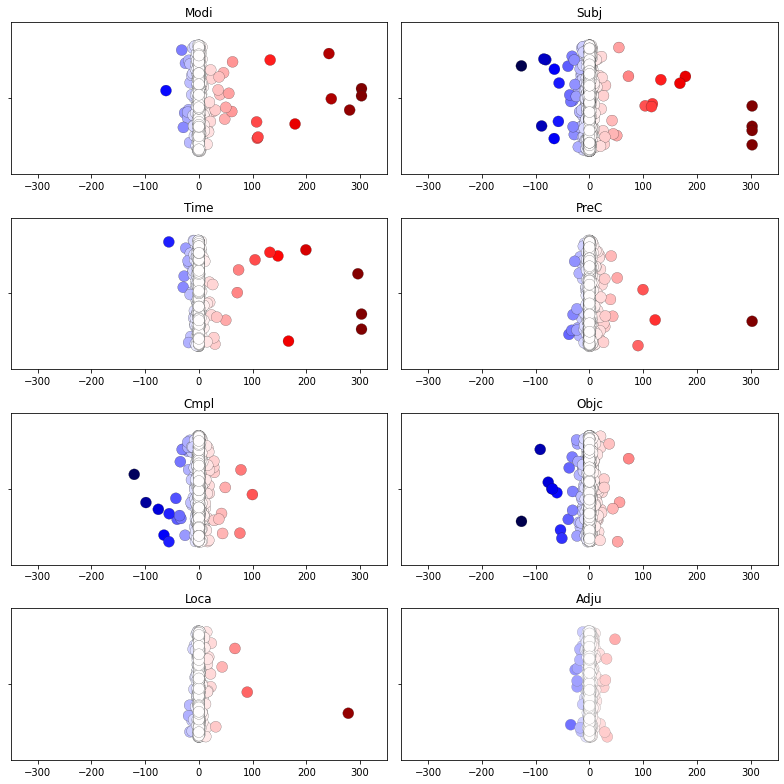

In [15]:
ordered_functs = [
    'Modi', 'Subj',
    'Time','PreC',
    'Cmpl', 'Objc',
    'Loca', 'Adju', 
]

fig, axs = plt.subplots(4, 2, figsize=(11,11))
axs = axs.ravel()
cmap = plt.get_cmap('seismic')

for i, function in enumerate(ordered_functs):
    
    data = lex_fs.loc[function]

    # since there are a lot of zero values which stack up onto each other,
    # we do not need to plot all of them; plotting a subset will look exactly
    # the same and be much more efficient + create a smaller sized image
    notzero = data[data != 0].values
    zero = data[data == 0].values[:100]
    data = np.concatenate([notzero, zero])

    # get diverging colors for stripplot
    hue, palette = stripplot_divcolors(
        data,
        fishermin+50,
        0,
        fishermax-50,
        cmap
    )

    # plot the data
    ax = axs[i]
    dummyY = ['']*data.shape[0] # needed due to bug with Y & hue
    sns.stripplot(
         ax=ax,
         x=data, 
         y=dummyY,
         jitter=0.35,
         s=11,
         linewidth=0.2,
         hue=hue,
         palette=palette,
    )
    ax.legend_.remove()
    ax.set_title(f'{function}')
    ax.set_xlim(-350, 350)
    
plt.tight_layout()
out.plot('attraction_plot')

## Quantifying Attraction

In [16]:
def countsig(series, sig=50):
    """Count the number of statistically significant scores in a series."""
    return series[series >= sig].size

### N-statistically significant values

Number of items with statistically significant attraction:

In [17]:
lex_fs.agg(
    countsig,
    axis=1,
    sig=1.3)\
    .sort_values(ascending=False)

Objc    473
Cmpl    345
PreC    329
Adju    298
Subj    269
Modi    213
Loca    155
Time     50
dtype: int64

In [18]:
lex_fs.agg(
    countsig,
    axis=1,
    sig=1.3)\
    .sort_values(ascending=False)

Objc    473
Cmpl    345
PreC    329
Adju    298
Subj    269
Modi    213
Loca    155
Time     50
dtype: int64

Number of highly attracted items:

In [19]:
lex_fs.agg(
    countsig,
    axis=1,
    sig=50)\
    .sort_values(ascending=False)

Modi    14
Subj    13
Time    11
PreC     5
Cmpl     3
Loca     3
Objc     3
Adju     0
dtype: int64

###  Lexical Diversity


Determine how many head lexemes per 100 uses are found for each function.
Adapted from ["Normalizing Word Counts"](http://www.thegrammarlab.com/?nor-portfolio=normalizing-word-counts).

In [20]:
lex_ctT = lex_ct.T
is_attested = (lex_ctT > 0) * 1
n_attested = is_attested.sum()
head_per_100 = (n_attested / lex_ctT.sum()) * 100 # normalize per 100 uses of the function
head_per_100 = head_per_100.sort_values(ascending=False)

In [21]:
lex_data = (
    pd.concat([n_attested, head_per_100], 1)
    .set_axis(['total', 'per 100x'], 1)
    .rename_axis('unique heads', axis=1)
    .round(2)
    .sort_values(by='per 100x', ascending=False)
)

out.table(
    lex_data,
    'uniqueper100',
    caption='Unique head lexeme frequencies per 100 uses'
)

lex_data

unique heads,total,per 100x
function,,
Adju,1499,21.56
PreC,1887,19.34
Loca,361,16.16
Objc,2247,13.20
Cmpl,2066,11.38
Modi,351,9.90
Subj,2427,9.25
Time,102,3.14


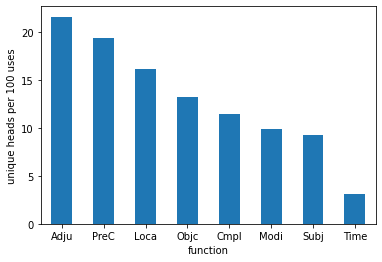

In [22]:
fig, ax = plt.subplots()
lex_data['per 100x'].plot(kind='bar', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('unique heads per 100 uses')
out.plot('bar_uniqueper100')

### Attracted head by function

In [23]:
# gather dfs of dat with word associations

top_heads = [] 
for funct in lex_fs.index:
    
    fishers = lex_fs.loc[funct]\
        .sort_values(ascending=False)\
        .round().astype(int)
    
    totals = lex_ct.loc[funct]\
        .sort_values(ascending=False)
    
    prop = ((totals / totals.sum()) * 100).round(1).astype(str) + '%'
    
    word_df = pd.concat([totals, prop, fishers], 1)\
        .droplevel([0,1], 0)\
        .reset_index()\
        .set_axis(['lexeme', 'totals', '%', 'Fishers'], 1)\
        .sort_values(ascending=False, by='Fishers')\
        .set_axis(np.arange(1, totals.index.shape[0]+1))\
        .rename_axis(index='rank')
        
        
    top_heads.append(word_df)

In [24]:
top_heads[0].head()

,lexeme,totals,%,Fishers
rank,,,,
1,\texthebrew{כן},159,2.3%,48
2,\texthebrew{פה},114,1.6%,33
3,\texthebrew{זאת},51,0.7%,32
4,\texthebrew{רב},32,0.5%,30
5,\texthebrew{חרב},88,1.3%,28


In [25]:
lex_comb = pd.concat(top_heads, axis=1, keys=lex_fs.index)
lex_comb.head()

Adju                                      Cmpl               \
                lexeme totals     % Fishers               lexeme totals     %   
rank                                                                            
1      \texthebrew{כן}    159  2.3%      48     \texthebrew{ארץ}    726  4.0%   
2      \texthebrew{פה}    114  1.6%      33  \texthebrew{ירושלם}    246  1.4%   
3     \texthebrew{זאת}     51  0.7%      32     \texthebrew{בית}    524  2.9%   
4      \texthebrew{רב}     32  0.5%      30      \texthebrew{יד}    485  2.7%   
5     \texthebrew{חרב}     88  1.3%      28   \texthebrew{מצרים}    164  0.9%   

                           Loca         ...  PreC                       Subj  \
     Fishers             lexeme totals  ...     % Fishers             lexeme   
rank                                    ...                                    
1        100    \texthebrew{שם}    312  ...  3.5%     303   \texthebrew{אני}   
2         78   \texthebrew{ארץ}    221  ...  2.1%     122   \texthebrew{אתה}   
3         76  \texthebrew{מדבר}     76  ...  1.4%     100  \texthebrew{יהוה}   
4         49    \texthebrew{הר}     74  ...  1.2%      90   \texthebrew{הוא}   
5         44  \texthebrew{מקום}     56  ...  0.6%      52  \texthebrew{אנכי}   

                                        Time                        
     totals     % Fishers             lexeme totals      % Fishers  
rank                                                                
1       742  2.8%     303   \texthebrew{עתה}    356  11.0%     303  
2       640  2.4%     303   \texthebrew{יום}   1281  39.5%     303  
3      2067  7.9%     303   \texthebrew{שנה}    262   8.1%     296  
4       952  3.6%     303  \texthebrew{עולם}    183   5.6%     199  
5       341  1.3%     178  \texthebrew{לילה}    133   4.1%     167  

[5 rows x 32 columns]

In [26]:
# export the top 3

mst_lexs = lex_comb[['Modi', 'Subj', 'Time']].head(20)

out.table(
    mst_lexs,
    'mst_lexs',
    caption='Top Associated Head Lexemes by Function',
    adjustbox=True,
)

mst_lexs

Modi                                      Subj         \
                 lexeme totals      % Fishers              lexeme totals   
rank                                                                       
1       \texthebrew{כה}    565  15.9%     303    \texthebrew{אני}    742   
2      \texthebrew{עוד}    415  11.7%     303    \texthebrew{אתה}    640   
3      \texthebrew{לכן}    200   5.6%     280   \texthebrew{יהוה}   2067   
4       \texthebrew{כן}    287   8.1%     246    \texthebrew{הוא}    952   
5      \texthebrew{מאד}    197   5.6%     242   \texthebrew{אנכי}    341   
6       \texthebrew{גם}    128   3.6%     179    \texthebrew{היא}    330   
7     \texthebrew{יחדו}     95   2.7%     133    \texthebrew{אתם}    254   
8     \texthebrew{סביב}    126   3.6%     110    \texthebrew{איש}    871   
9       \texthebrew{אף}     78   2.2%     109    \texthebrew{המה}    241   
10      \texthebrew{אך}     77   2.2%     107     \texthebrew{הם}    206   
11    \texthebrew{אולי}     45   1.3%      63   \texthebrew{אדני}    199   
12     \texthebrew{פעם}     60   1.7%      61    \texthebrew{דוד}    381   
13     \texthebrew{יחד}     43   1.2%      56  \texthebrew{אנחנו}    101   
14      \texthebrew{רק}     36   1.0%      50    \texthebrew{כהן}    235   
15     \texthebrew{מות}     54   1.5%      48    \texthebrew{מלך}    509   
16     \texthebrew{ככה}     35   1.0%      46     \texthebrew{בן}    757   
17      \texthebrew{אז}     54   1.5%      39     \texthebrew{כל}    176   
18     \texthebrew{חנם}     28   0.8%      38   \texthebrew{שאול}    166   
19     \texthebrew{רבה}     29   0.8%      36     \texthebrew{את}     50   
20    \texthebrew{פתאם}     23   0.6%      31  \texthebrew{אלהים}    429   

                                  Time                        
         % Fishers              lexeme totals      % Fishers  
rank                                                          
1     2.8%     303    \texthebrew{עתה}    356  11.0%     303  
2     2.4%     303    \texthebrew{יום}   1281  39.5%     303  
3     7.9%     303    \texthebrew{שנה}    262   8.1%     296  
4     3.6%     303   \texthebrew{עולם}    183   5.6%     199  
5     1.3%     178   \texthebrew{לילה}    133   4.1%     167  
6     1.3%     168     \texthebrew{עת}    144   4.4%     147  
7     1.0%     133    \texthebrew{בקר}    116   3.6%     132  
8     3.3%     117    \texthebrew{ערב}     83   2.6%     105  
9     0.9%     115     \texthebrew{אז}     77   2.4%      74  
10    0.8%     104    \texthebrew{חדש}     67   2.1%      72  
11    0.8%      73    \texthebrew{מחר}     37   1.1%      50  
12    1.5%      55   \texthebrew{מחרת}     25   0.8%      33  
13    0.4%      51    \texthebrew{מתי}     25   0.8%      30  
14    0.9%      44    \texthebrew{נצח}     26   0.8%      28  
15    1.9%      42   \texthebrew{תמיד}     30   0.9%      26  
16    2.9%      30   \texthebrew{יומם}     19   0.6%      23  
17    0.7%      29     \texthebrew{עד}     18   0.6%      20  
18    0.6%      28     \texthebrew{אן}     14   0.4%      20  
19    0.2%      26    \texthebrew{מות}     27   0.8%      16  
20    1.6%      25  \texthebrew{צהרים}     13   0.4%      15

What % of Subj is personal pronouns?

In [27]:
subj_headpos = df_sgph[df_sgph.function=='Subj'].heads_POS.value_counts()

subj_headpos

NOUN     15754
PROPN     6056
PRPS      3889
QUANT      242
CARD1      160
CARD        47
ORDN        42
PRDE        37
INTJ         1
Name: heads_POS, dtype: int64

In [28]:
subj_headpos_pr = subj_headpos / subj_headpos.sum()

subj_headpos_pr

NOUN     0.600656
PROPN    0.230898
PRPS     0.148277
QUANT    0.009227
CARD1    0.006100
CARD     0.001792
ORDN     0.001601
PRDE     0.001411
INTJ     0.000038
Name: heads_POS, dtype: float64

In [32]:
out.string(
    str(int((subj_headpos_pr['PRPS'] * 100).round()))+'%',
    'subjprps'
)